In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
# We'll use a synthetic dataset for simplicity
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)
df = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])
df['y'] = y

In [3]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)

# %% 
# Define alpha values to try
alphas = np.logspace(-3, 3, 7)  # 0.001, 0.01, ..., 1000


In [4]:
# Lasso Regression
print("Lasso Regression")
lasso_mse = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    lasso_mse.append(mse)
    print(f"Alpha={alpha:.3f}, MSE={mse:.2f}, Coefficients={lasso.coef_}")

Lasso Regression
Alpha=0.001, MSE=191.37, Coefficients=[ 2.67115997 11.29226948 65.50457344 18.54236181 69.47516016]
Alpha=0.010, MSE=191.31, Coefficients=[ 2.66445314 11.28325876 65.49685072 18.53210496 69.46496502]
Alpha=0.100, MSE=190.76, Coefficients=[ 2.59738481 11.19315158 65.41962346 18.42953644 69.36301362]
Alpha=1.000, MSE=188.95, Coefficients=[ 1.92670152 10.29207973 64.64735089 17.40385132 68.34349963]
Alpha=10.000, MSE=508.22, Coefficients=[ 0.          0.88536034 56.34037966  7.04872198 58.21746947]
Alpha=100.000, MSE=9310.01, Coefficients=[0. 0. 0. 0. 0.]
Alpha=1000.000, MSE=9310.01, Coefficients=[0. 0. 0. 0. 0.]


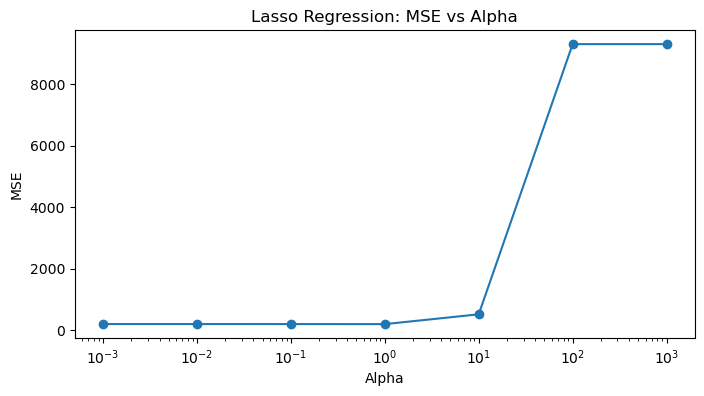

In [5]:
# Plot Lasso MSE vs Alpha
plt.figure(figsize=(8,4))
plt.plot(alphas, lasso_mse, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression: MSE vs Alpha')
plt.show()

In [6]:
# Ridge Regression
print("Ridge Regression")
ridge_mse = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)
    print(f"Alpha={alpha:.3f}, MSE={mse:.2f}, Coefficients={ridge.coef_}")

Ridge Regression
Alpha=0.001, MSE=191.38, Coefficients=[ 2.67152893 11.29330975 65.50502804 18.54338513 69.47583105]
Alpha=0.010, MSE=191.36, Coefficients=[ 2.67182896 11.29265259 65.50125355 18.54213283 69.47169014]
Alpha=0.100, MSE=191.14, Coefficients=[ 2.6748247  11.28608554 65.46353278 18.52961917 69.43030827]
Alpha=1.000, MSE=189.32, Coefficients=[ 2.70433015 11.22086054 65.08872514 18.40540461 69.01918896]
Alpha=10.000, MSE=204.25, Coefficients=[ 2.95832558 10.61016243 61.56597605 17.24904853 65.16113336]
Alpha=100.000, MSE=1530.53, Coefficients=[ 3.56443742  6.932188   40.00150803 10.59354498 41.80462848]
Alpha=1000.000, MSE=7000.63, Coefficients=[1.35839116 1.59511163 8.92522037 2.18240468 9.12258781]


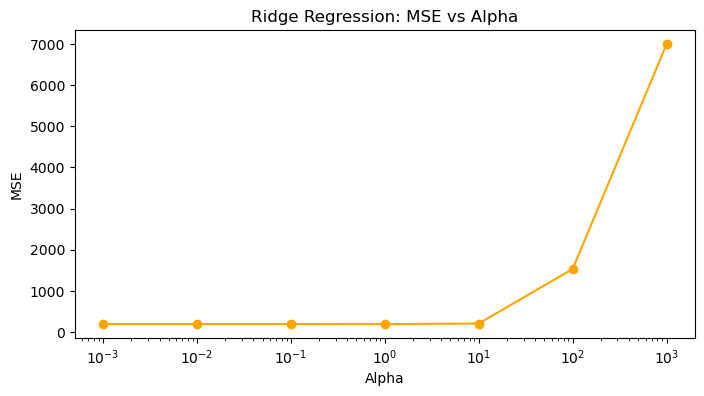

In [7]:
# Plot Ridge MSE vs Alpha
plt.figure(figsize=(8,4))
plt.plot(alphas, ridge_mse, marker='o', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression: MSE vs Alpha')
plt.show()